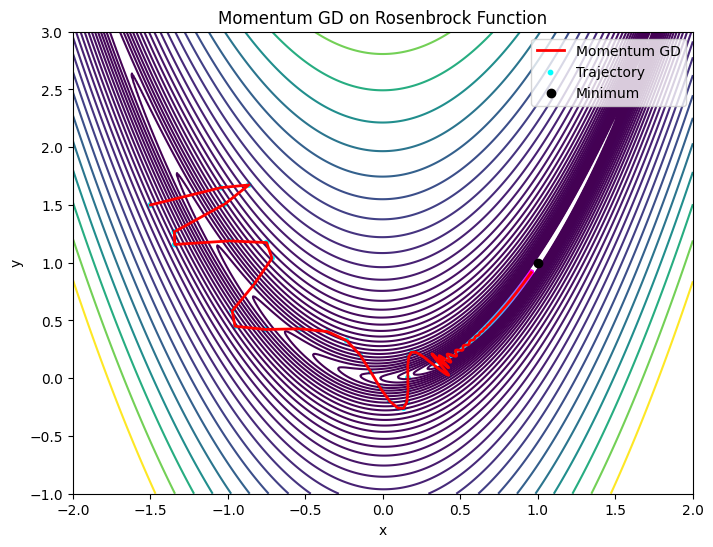

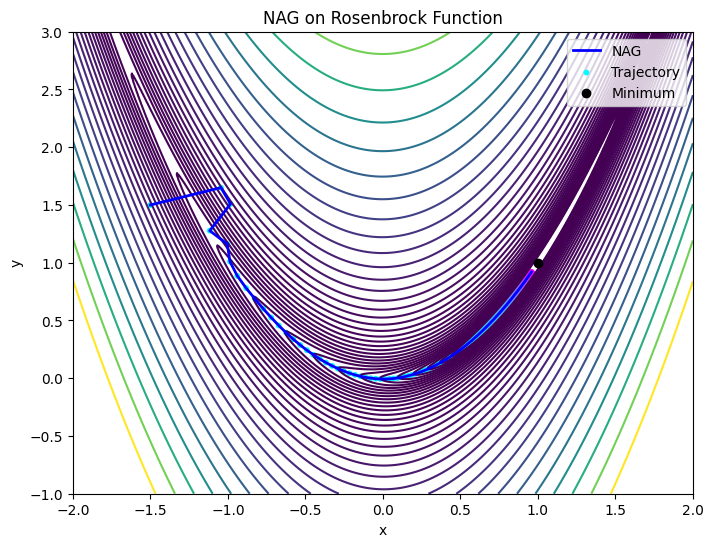

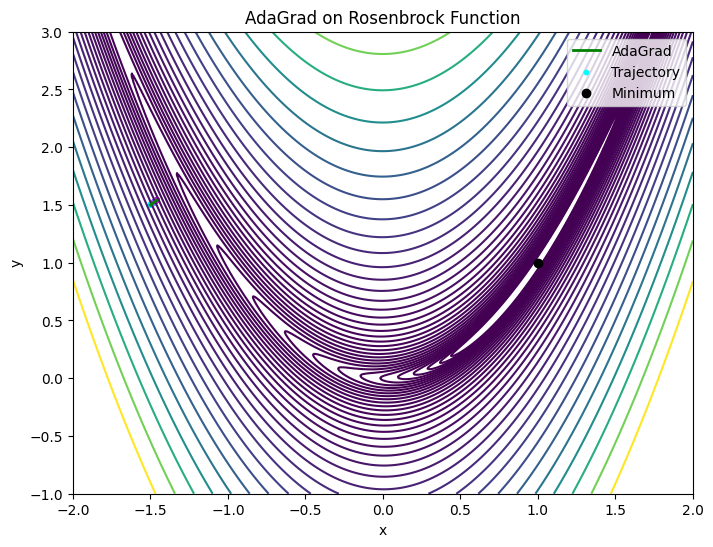

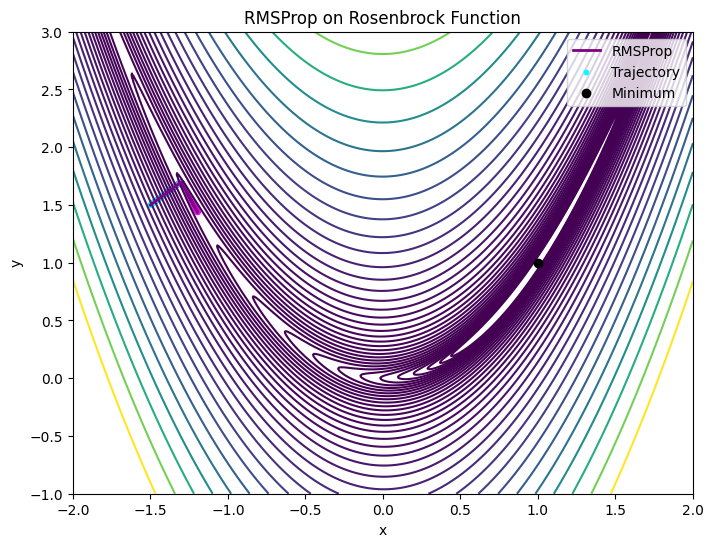

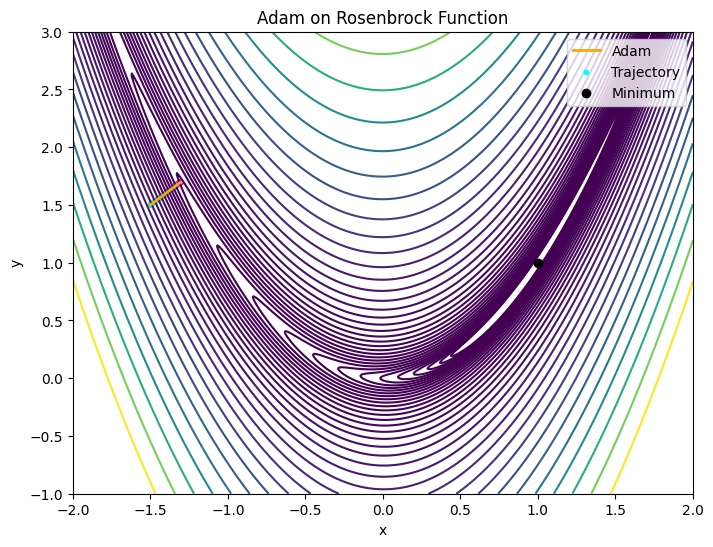

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function and its gradient
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

# Optimization functions
def momentum_gd(start, lr, beta, iterations):
    x, y = start
    velocity = np.array([0.0, 0.0])
    trajectory = [(x, y)]

    for _ in range(iterations):
        grad = rosenbrock_grad(x, y)
        velocity = beta * velocity - lr * grad
        x, y = x + velocity[0], y + velocity[1]
        trajectory.append((x, y))

    return np.array(trajectory)

def nesterov_agd(start, lr, beta, iterations):
    x, y = start
    velocity = np.array([0.0, 0.0])
    trajectory = [(x, y)]

    for _ in range(iterations):
        lookahead = np.array([x, y]) + beta * velocity
        grad = rosenbrock_grad(lookahead[0], lookahead[1])
        velocity = beta * velocity - lr * grad
        x, y = x + velocity[0], y + velocity[1]
        trajectory.append((x, y))

    return np.array(trajectory)

def adagrad(start, lr, iterations):
    x, y = start
    grad_squared = np.array([0.0, 0.0])
    epsilon = 1e-8
    trajectory = [(x, y)]

    for _ in range(iterations):
        grad = rosenbrock_grad(x, y)
        grad_squared += grad**2
        adjusted_lr = lr / (np.sqrt(grad_squared) + epsilon)
        x, y = x - adjusted_lr[0] * grad[0], y - adjusted_lr[1] * grad[1]
        trajectory.append((x, y))

    return np.array(trajectory)

def rmsprop(start, lr, beta, iterations):
    x, y = start
    grad_squared = np.array([0.0, 0.0])
    epsilon = 1e-8
    trajectory = [(x, y)]

    for _ in range(iterations):
        grad = rosenbrock_grad(x, y)
        grad_squared = beta * grad_squared + (1 - beta) * grad**2
        adjusted_lr = lr / (np.sqrt(grad_squared) + epsilon)
        x, y = x - adjusted_lr[0] * grad[0], y - adjusted_lr[1] * grad[1]
        trajectory.append((x, y))

    return np.array(trajectory)

def adam(start, lr, beta1, beta2, iterations):
    x, y = start
    m = np.array([0.0, 0.0])
    v = np.array([0.0, 0.0])
    epsilon = 1e-8
    trajectory = [(x, y)]

    for t in range(1, iterations + 1):
        grad = rosenbrock_grad(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x, y = x - lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon), y - lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        trajectory.append((x, y))

    return np.array(trajectory)

# Parameters
learning_rate = 0.001
beta = 0.9
iterations = 500
start_point = (-1.5, 1.5)

# Perform optimization
traj_momentum = momentum_gd(start_point, learning_rate, beta, iterations)
traj_nag = nesterov_agd(start_point, learning_rate, beta, iterations)
traj_adagrad = adagrad(start_point, learning_rate, iterations)
traj_rmsprop = rmsprop(start_point, learning_rate, beta, iterations)
traj_adam = adam(start_point, learning_rate, beta1=0.9, beta2=0.999, iterations=iterations)

# Plot results
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

methods = [
    (traj_momentum, "Momentum GD", "red"),
    (traj_nag, "NAG", "blue"),
    (traj_adagrad, "AdaGrad", "green"),
    (traj_rmsprop, "RMSProp", "purple"),
    (traj_adam, "Adam", "orange")
]

for traj, label, color in methods:
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3, 35), cmap='viridis')
    plt.plot(traj[:, 0], traj[:, 1], label=label, color=color, linewidth=2)
    plt.scatter(traj[:, 0], traj[:, 1], c=np.arange(len(traj)), cmap='cool', s=10, label="Trajectory")
    plt.scatter(1, 1, color='black', label='Minimum', zorder=5)
    plt.legend()
    plt.title(f'{label} on Rosenbrock Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()